In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
ds1 = pd.read_csv('bottle.csv')
ds2 = pd.read_csv('cast.csv')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Dataset contains oceanic measurements of over past 60 years.
####  I will be using the following steps for my analysis
## Step 1: Data Exploration

In [15]:
# ds1.describe()
# ds1.info()
ds1.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ds2.head()
ds2.describe()


,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


### DS2 or the Cast.csv may not be useful for the analysis. So Dropping it

In [22]:
ds2 = None

In [24]:
print(ds1.head())
ds1.info()

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat         ...           \
0       0   10.50  33.440     NaN  25.649    NaN         ...            
1       8   10.46  33.440     NaN  25.656    NaN         ...            
2      10   10.46  33.437     NaN  25.654    NaN         ...            
3      19   10.45  33.420     NaN  25.643    NaN         ...            
4      20   10.45  33.421     NaN  25.643    NaN         ...            

   R_PHAEO  R_PRES  R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  \
0      NaN       0     NaN   NaN   NaN  Na

In [26]:
ds1.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [87]:
data = ds1.copy()

In [88]:

print("Null values in Salinty: \n",pd.isnull(data['Salnty']).value_counts(),'\n\n')
print("Null values in Temperature(Celcius): \n",pd.isnull(data['T_degC']).value_counts())


Null values in Salinty: 
 False    817509
True      47354
Name: Salnty, dtype: int64 


Null values in Temperature(Celcius): 
 False    853900
True      10963
Name: T_degC, dtype: int64


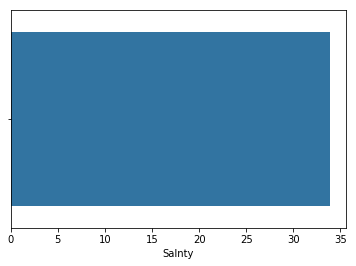

In [91]:
# sns.barplot(data['Salnty'],)

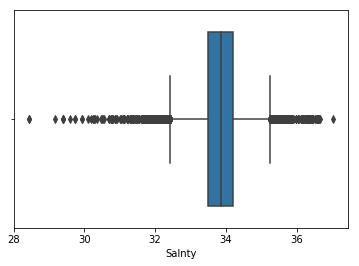

In [89]:
# sns.barplot(data['Salnty'].dropna(inplace=True))
sns.boxplot(data['Salnty'])

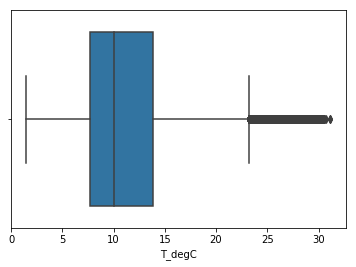

In [90]:
sns.boxplot(data['T_degC'])

In [66]:
pd.isnull(data[data['T_degC'] != None]['T_degC']).value_counts()

False    853900
True      10963
Name: T_degC, dtype: int64

In [94]:
print("Nulls in T_degC:   ",data['T_degC'].isnull().sum())
print("Nulls in Salnty:   ",data['Salnty'].isnull().sum())

print("\n\nNulls vs Valued in T_degC:\n",data['T_degC'].isnull().value_counts())
print("\nNulls vs Valued in Salnty:\n",data['Salnty'].isnull().value_counts())
# data['T_degC'].isnull().sum()

Nulls in T_degC:    10963
Nulls in Salnty:    47354


Nulls vs Valued in T_degC:
 False    853900
True      10963
Name: T_degC, dtype: int64

Nulls vs Valued in Salnty:
 False    817509
True      47354
Name: Salnty, dtype: int64


In [95]:
def assign_temp(tup):
    print(tup)
    
data['T_degC'] = zip(data['T_degC'],data['Salnty']).apply(assign_temp)

AttributeError: 'zip' object has no attribute 'apply'

In [101]:
data[['Salnty','T_degC']].dropna(inplace=True)

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [109]:
ndata = data.loc[(data['T_degC'].isnull() == False) & (data['Salnty'].isnull() == False)][['Salnty','T_degC']]

In [121]:
print("T_degC Non-null values:\n",ndata['T_degC'].isnull().value_counts(),"\n\nSalnty Non-null values:\n",ndata['Salnty'].isnull().value_counts())

T_degC Non-null values:
 False    814247
Name: T_degC, dtype: int64 

Salnty Non-null values:
 False    814247
Name: Salnty, dtype: int64


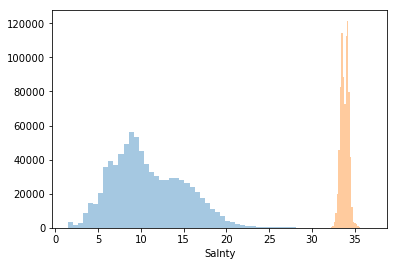

In [124]:
plt.figure(num=2)
sns.distplot(ndata['T_degC'],kde=False)
sns.distplot(ndata['Salnty'],kde=False)

# sns.set_style()

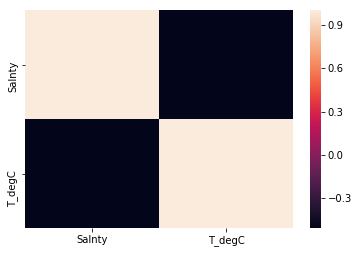

In [126]:
sns.heatmap(ndata.corr())

In [145]:
data.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

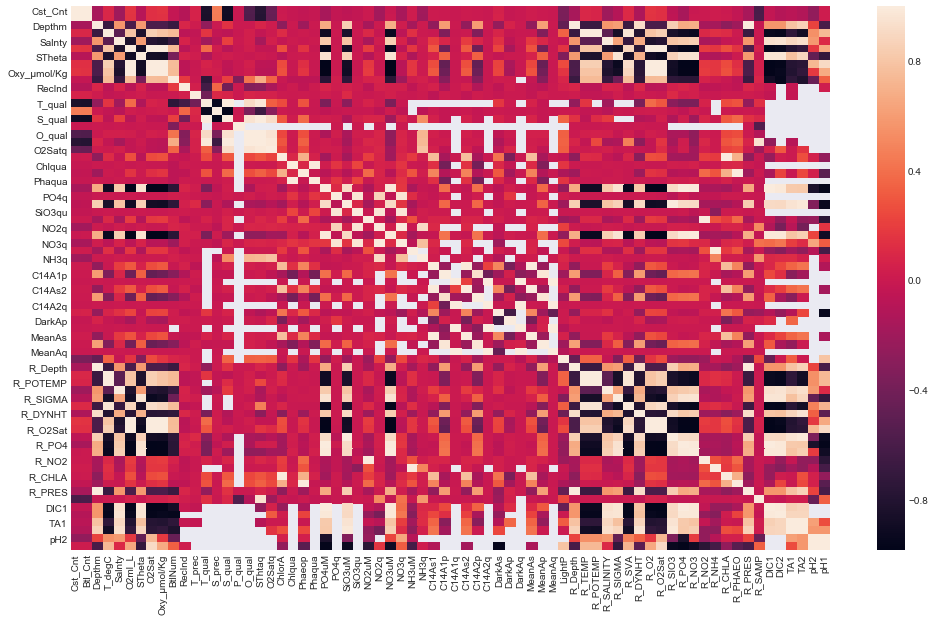

In [144]:
plt.figure(figsize=(17,10))
sns.heatmap(data.corr())
sns.set_style('darkgrid')

In [ ]:
data.pivot_table()

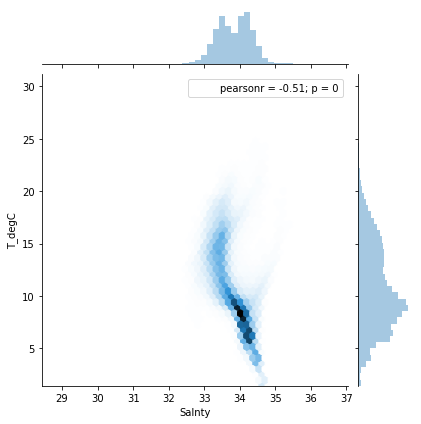

In [132]:
sns.jointplot('Salnty','T_degC',data=ndata,kind="hex")

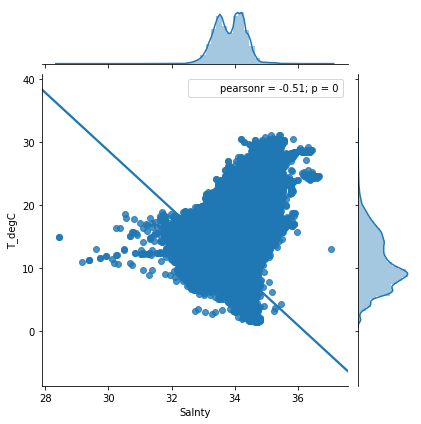

In [130]:
sns.jointplot('Salnty','T_degC',data=ndata,kind="reg")

In [133]:
ndata.corr()

,Salnty,T_degC
Salnty,1.000000,-0.505266
T_degC,-0.505266,1.000000


In [136]:
data.isnull().sum()
# sns.countplot(data.isnull().sum(),)

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

KeyboardInterrupt: 

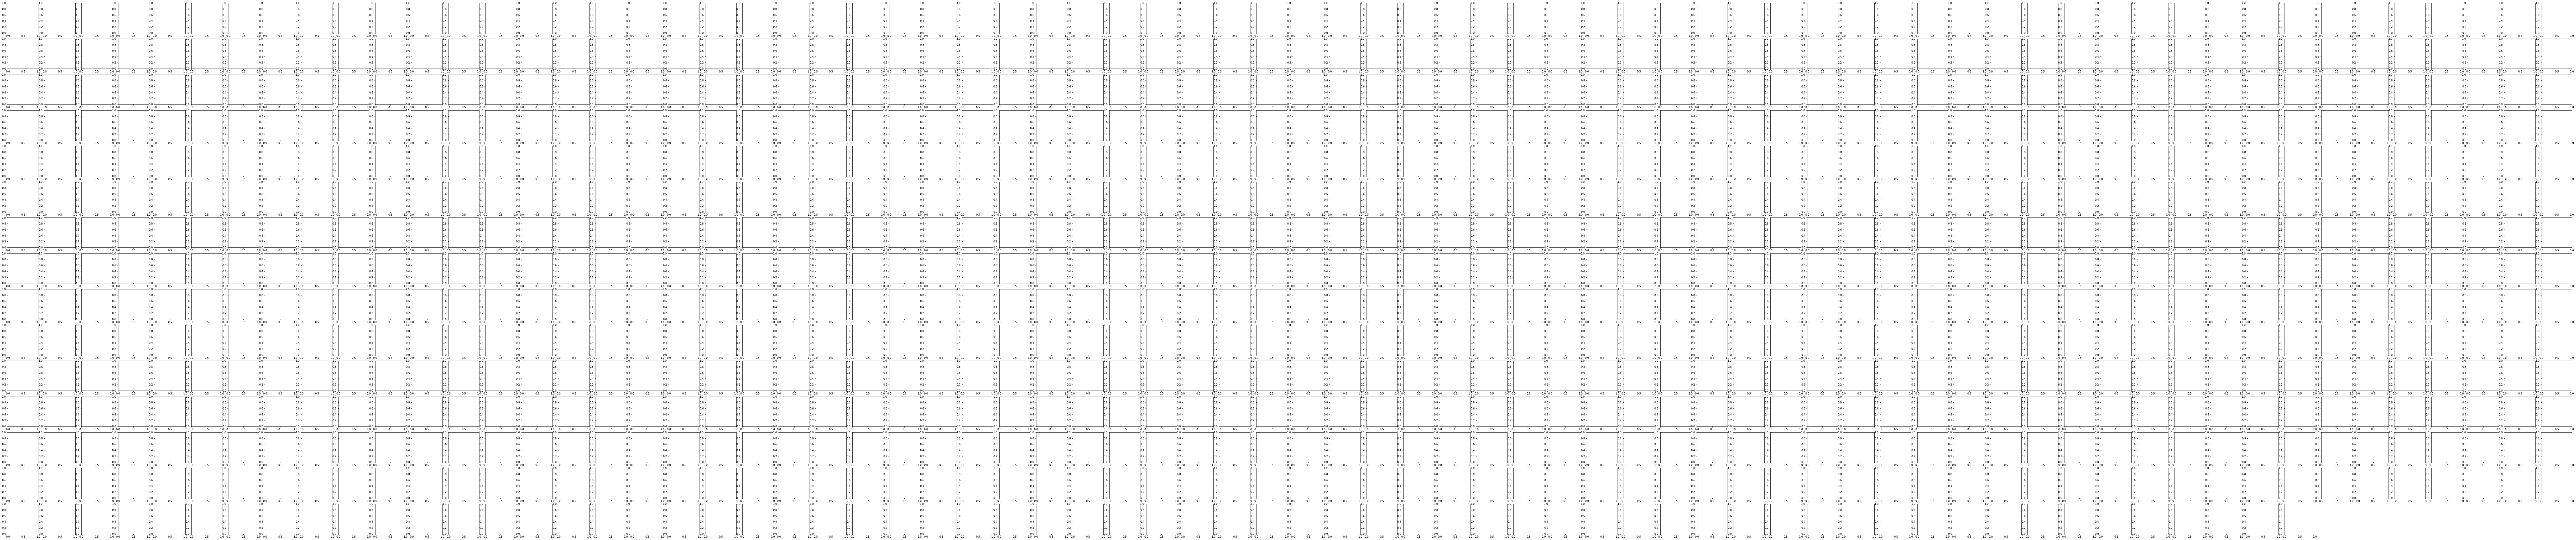

In [137]:
sns.pairplot(data)